In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

In [2]:
df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [3]:
df['Country Name'].nunique() == df['Country Code'].nunique()

True

In [4]:
df['Year']

0        1968
1        1969
2        1970
3        1971
4        1972
         ... 
11502    2012
11503    2013
11504    2014
11505    2015
11506    2016
Name: Year, Length: 11507, dtype: int64

In [5]:
df_pr = df[df['Country Name'] == 'World']

In [6]:
len(df_pr)

57

<AxesSubplot:xlabel='Years', ylabel='GDP'>

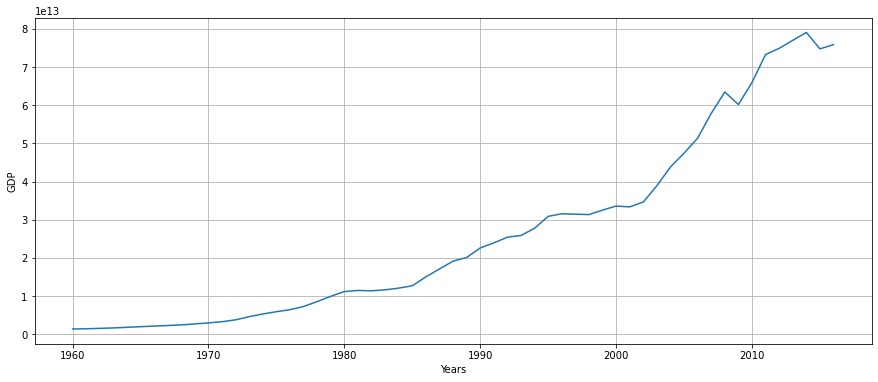

In [7]:
df_pr.plot(kind = 'line' , x = 'Year', y = 'Value', 
           figsize = (15,6), 
           legend = False, 
           grid = True,
           xlabel = 'Years', 
           ylabel = 'GDP')

In [8]:
df_pr.head()

,Country Name,Country Code,Year,Value
2249,World,WLD,1960,1.366678e+12
2250,World,WLD,1961,1.421788e+12
2251,World,WLD,1962,1.526955e+12
2252,World,WLD,1963,1.643752e+12
2253,World,WLD,1964,1.800796e+12


## Finding GDP Growth for World

In [9]:
df_pr = df[df['Country Name'] == 'World']

data = df_pr.values
gdp_change = [0]

for i in range(1,len(data)):
    gdp_change.append(round((((data[i][3] - data[i-1][3])/data[i-1][3])*100),2))
    
df_pr = df_pr.assign(GDP = gdp_change)

## Finding GDP Growth for India

In [10]:
df_pr = df[df['Country Name'] == 'India']

data = df_pr.values
gdp_change = [0]

for i in range(1,len(data)):
    gdp_change.append(round((((data[i][3] - data[i-1][3])/data[i-1][3])*100),2))
    
df_pr = df_pr.assign(GDP_Growth = gdp_change)

## Creating GDP Growth Column on main Dataset

In [11]:
final_data = []

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):
        gdp_change.append(round((((data[i][3] - data[i-1][3])/data[i-1][3])*100),2))

    df_pr = df_pr.assign(GDP_Growth = gdp_change)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)

## Finding Current/Maximum GDP of Every Country

In [12]:
df.groupby('Country Name').max()['Value'].sort_values( ascending = False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

## Plotting Graphs using Plotly

In [13]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = "Year", y = "Value", title = 'World GDP Analysis', range_y = [0,80000000000000])

pyo.plot(fig, filename = 'World.html')

'World.html'

## GDP of each country throughtout the history

In [14]:
os.mkdir('GDPs Individual')

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    fig = px.line(df_pr, x = "Year", y = "Value", title = country_name + ' Analysis')
    pyo.plot(fig, filename = "GDPs Individual/"+country_name+'.html', auto_open = False)

## GDP of each country throughtout the history Compared to World GDP Chart

In [15]:
os.mkdir('GDPs Same Scale')

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    fig = px.line(df_pr, x = "Year", y = "Value", title = country_name + ' Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = "GDPs Same Scale/"+country_name+'.html', auto_open = False)

## GDP of All countries

In [16]:
fig = px.line(df, x = "Year", y = "Value", title = 'GDP of All Countries', color = 'Country Name')

pyo.plot(fig, filename = 'GDP of All Countries.html', auto_open = False)

'GDP of All Countries.html'

## GDP of All countries with Markers

In [17]:
fig = px.line(df, x = "Year", y = "Value", title = 'GDP of All Countries', color = 'Country Name', markers = True)

pyo.plot(fig, filename = 'GDP of All Countries with Marker.html', auto_open = False)

'GDP of All Countries with Marker.html'

## Compare GDPs of Specific Countries based on Country Code

In [18]:
'-'.join(['ITA', 'IND', 'USA', 'CHN'])

'ITA-IND-USA-CHN'

In [19]:
def compare_gdp_by_code(lst):    

    dfs = []

    for i in lst:    
        dfs.append(df[df['Country Code'] == i])

    df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = "Year", y = "Value", title = '|'.join(lst), color = 'Country Name')
#    fig.show()
    
    pyo.plot(fig, filename = '-'.join(lst)+ '.html', auto_open = False)
    
    return df_pr
    
df_pr = compare_gdp_by_code(['ITA', 'IND', 'USA', 'CHN'])

## Compare GDPs of Specific Countries based on Country Name

In [20]:
def compare_gdp_by_name(lst):    

    dfs = []

    for i in lst:    
        dfs.append(df[df['Country Name'] == i])

    df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = "Year", y = "Value", title = '|'.join(lst), color = 'Country Name')
#    fig.show()
    
    pyo.plot(fig, filename = '-'.join(lst)+ '.html', auto_open = False)
    
    return df_pr
    
df_pr = compare_gdp_by_name(['Italy', 'India', 'United States', 'China'])

## Comparing GDP Growth with different Countries

In [21]:
def compare_gdp(lst):    

    dfs = []

    for i in lst:    
        dfs.append(df[df['Country Code'] == i])

    df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = 'Year', y = 'GDP_Growth', title = '|'.join(lst), color = 'Country Name')
#    fig.show()
    
    pyo.plot(fig, filename = "GDP Growth | " + '-'.join(lst)+ '.html', auto_open = False)
    
    return df_pr
    
df_pr = compare_gdp(['ITA', 'IND', 'USA', 'CHN'])

## Adding More functionalirties on GDP Growth Compare Function

In [22]:
def compare_gdp(lst, by):    

    dfs = []

    for i in lst:    
        dfs.append(df[df['Country Code'] == i])

    df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = 'Year', y = by, title = '|'.join(lst), color = 'Country Name')
#    fig.show()
    
    pyo.plot(fig, filename = "GDP Growth by " + by + " | " + '-'.join(lst)+ '.html', auto_open = False)
    
    return df_pr
    
df_pr = compare_gdp(['ITA', 'IND', 'USA', 'CHN'], by = 'Value')

In [23]:
df_pr = compare_gdp(['USA','IND'], by = 'GDP_Growth')

## GDP Growth of Every Country in One Graph

In [24]:
fig = px.line(df, x = 'Year', y = 'GDP_Growth', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = "GDP Growth.html", auto_open = False)

'GDP Growth.html'

## GDP Growth of Every Country (1960 - 2016)

In [25]:
dfs = []

for i in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == i]
    
    if(len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'GDP_Growth', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = "GDP Growth (1960 - 2016).html", auto_open = False)

'GDP Growth (1960 - 2016).html'

## GDP Growth of each country

In [26]:
os.mkdir('GDP Growth')

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    fig = px.line(df_pr, x = "Year", y = "GDP_Growth", title = country_name + ' Analysis')
    
    pyo.plot(fig, filename = "GDP Growth/"+country_name+'.html', auto_open = False)